# Create deltal DO and NO3 plots to QAQC Main River 1 case (50% loading)

In [1]:
import sys
import os
sys.path.insert(1, '../scripts/')
import xarray
import openpyxl
import contextily as cx 
import yaml
import numpy as np
import pandas
import pathlib
import time
from datetime import date
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def load_data(baseline_file, run_file, loc, case):
    # load configuration file for this case
    with open(f'../../etc/SSM_config_{case}.yaml', 'r') as file:
        ssm = yaml.safe_load(file)
        # get shapefile path    
        shp = ssm['paths']['shapefile']
    # Define dimension sizes and load shapefile
    gdf = gpd.read_file(shp)
    gdf = gdf.rename(columns={'region_inf':'Regions'})
    regions = gdf[['node_id','Regions']].groupby(
        'Regions').count().index.to_list()
    regions.remove('Other')

    graphics_dir = pathlib.Path(ssm['paths']['graphics'])/case


    # Pull directory name from run_file path
    run_type = run_file.split('/')[-3]

    # Isolate run tag for image file naming
    run_tag = run_type.split("_")[0]

    if loc == "wc":
        with xarray.open_dataset(baseline_file) as ds:
            baseline_full=ds[[*ds][0]]
            # Sub-sample nodes (from 16012 nodes to 7494)
            baseline=baseline_full[:,:,gdf['tce']-1]
            # Apply "stat_type" across depth levels
            baseline_wc = getattr(np,stat_type)(baseline,axis=1)
            # Get number of days and nodes
            [ndays,nlevels,nnodes]=baseline.shape

        with xarray.open_dataset(run_file) as ds:
            param_full=ds[[*ds][0]]
            # Sub-sample nodes (from 16012 nodes to 7494)
            param=param_full[:,:,gdf['tce']-1]
            # Apply "stat_type" across depth levels
            param_wc = getattr(np,stat_type)(param,axis=1)
            # Get number of days and nodes
            [ndays,nlevels,nnodes]=param.shape
    else:
        with xarray.open_dataset(baseline_file) as ds:
            baseline_full=ds[[*ds][0]]
            # Sub-sample nodes (from 16012 nodes to 7494)
            baseline=baseline_full[:,gdf['tce']-1]
            # Apply "stat_type" across depth levels
            baseline_wc = getattr(np,stat_type)(baseline,axis=1)
            # Get number of days and nodes
            [ndays,nnodes]=baseline.shape

        with xarray.open_dataset(run_file) as ds:
            param_full=ds[[*ds][0]]
            # Sub-sample nodes (from 16012 nodes to 7494)
            param=param_full[:,gdf['tce']-1]
            # Apply "stat_type" across depth levels
            param_wc = getattr(np,stat_type)(param,axis=1)
            # Get number of days and nodes
            [ndays,nnodes]=param.shape
          
    return baseline_wc, param_wc
    

In [3]:
hotstart_4k = '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/SalishSeaModel/4k/ssm_hotstart_4k.nc'
case='main'

# load configuration file for this case
with open(f'../../etc/SSM_config_{case}.yaml', 'r') as file:
    ssm = yaml.safe_load(file)
    # get shapefile path    
    shp = ssm['paths']['shapefile']
# Define dimension sizes and load shapefile
gdf = gpd.read_file(shp)
gdf = gdf.rename(columns={'region_inf':'Regions'})
regions = gdf[['node_id','Regions']].groupby(
    'Regions').count().index.to_list()
regions.remove('Other')

graphics_dir = pathlib.Path(ssm['paths']['graphics'])/case


# # Pull directory name from run_file path
# run_type = run_file.split('/')[-3]

# # Isolate run tag for image file naming
# run_tag = run_type.split("_")[0]

with xarray.open_dataset(hotstart_4k) as ds:
    baseline_full=ds[[*ds][0]]
    # Sub-sample nodes (from 16012 nodes to 7494)
    # baseline=baseline_full[:,:,gdf['tce']-1]
    # # Apply "stat_type" across depth levels
    # baseline_wc = getattr(np,stat_type)(baseline,axis=1)
    # # Get number of days and nodes
    # [ndays,nlevels,nnodes]=baseline.shape

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


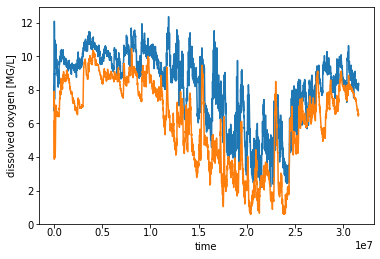

In [4]:
ds['DOXG'][:,9,15888].plot()# sinclair
ds['DOXG'][:,9,6565].plot() #bellingham

In [11]:
ds['DOXG'][:,:,15888].max()

<xarray.DataArray 'DOXG' ()>
array(13.1701, dtype=float32)

In [56]:
# inputs (case and shp are below): 
case = "main"
param="DOXG"
loc= "wc" # "surface" or "bottom"
stat_type="min" 
model_var=param
print('*****', param, '*****') 
run="4k"
frame="FullDomain"
run_file = f"/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/{case}/{param}/{run}/{loc}/daily_{stat_type}_{param}_{loc}.nc"
baseline_file = f"/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/{case}/{param}/wqm_baseline/{loc}/daily_{stat_type}_{param}_{loc}.nc"

[baseline_wc, param_wc]=load_data(baseline_file, run_file, loc, case)
print('2014 Conditions (min,max,median): ', baseline_wc.min().item(), baseline_wc.max().item(), baseline_wc.median().item())
print('4k (min,max,median): ', param_wc.min().item(), param_wc.max().item(), param_wc.median().item())

param="NO3"
model_var=param
print('*****', param, '*****')
loc= "surface" # "surface" or "bottom"
stat_type="mean" 
run_file = f"/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/{case}/{param}/{run}/{loc}/daily_{stat_type}_{param}_{loc}.nc"
baseline_file = f"/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/{case}/{param}/wqm_baseline/{loc}/daily_{stat_type}_{param}_{loc}.nc"

[baseline_wc, param_wc]=load_data(baseline_file, run_file, loc, case)
print('2014 Conditions (min,max,median): ', baseline_wc.min().item(), baseline_wc.max().item(), baseline_wc.median().item())
print('4k (min,max,median): ', param_wc.min().item(), param_wc.max().item(), param_wc.median().item())

param="salinity"
model_var=param
print('*****', param, '*****') 
loc= "surface" # "surface" or "bottom"
stat_type="mean" 
run_file = f"/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/{case}/{param}/{run}/{loc}/daily_{stat_type}_{param}_{loc}.nc"
baseline_file = f"/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/{case}/{param}/wqm_baseline/{loc}/daily_{stat_type}_{param}_{loc}.nc"

[baseline_wc, param_wc]=load_data(baseline_file, run_file, loc,case)
print('2014 Conditions (min,max,median): ', baseline_wc.min().item(), baseline_wc.max().item(), baseline_wc.median().item())
print('4k (min,max,median): ', param_wc.min().item(), param_wc.max().item(), param_wc.median().item())



***** DOXG *****
2014 Conditions (min,max,median):  6.30496987952256e-10 13.971400260925293 6.527029991149902
4k (min,max,median):  0.5258709788322449 9.969209968386869e+36 9.969209968386869e+36
***** NO3 *****


/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/.conda/envs/klone_jupyter/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


2014 Conditions (min,max,median):  0.02747185155749321 0.34198182821273804 0.16405777633190155
4k (min,max,median):  inf inf inf
***** salinity *****
2014 Conditions (min,max,median):  21.011362075805664 25.245166778564453 23.20908546447754
4k (min,max,median):  inf inf inf


/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/.conda/envs/klone_jupyter/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


***** NO3 *****
2014 Conditions (min,max,median):  6.30496987952256e-10 13.971400260925293 6.527029991149902
4k (min,max,median):  0.5258709788322449 9.969209968386869e+36 9.969209968386869e+36


In [36]:
# load configuration file for this case
with open(f'../../etc/SSM_config_{case}.yaml', 'r') as file:
    ssm = yaml.safe_load(file)
    # get shapefile path    
    shp = ssm['paths']['shapefile']
# Define dimension sizes and load shapefile
gdf = gpd.read_file(shp)
gdf = gdf.rename(columns={'region_inf':'Regions'})
regions = gdf[['node_id','Regions']].groupby(
    'Regions').count().index.to_list()
regions.remove('Other')

graphics_dir = pathlib.Path(ssm['paths']['graphics'])/case


# Pull directory name from run_file path
run_type = run_file.split('/')[-3]

# Isolate run tag for image file naming
run_tag = run_type.split("_")[0]


(361, 16012)

In [46]:
case = "main"
param="DOXG"
loc="wc"
loc= "wc" # "surface" or "bottom"
stat_type="min" 
model_var=param
print('*****', param, '*****') 
run="4k"
frame="FullDomain"
run_file = f"/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/{case}/{param}/{run}/{loc}/daily_{stat_type}_{param}_{loc}.nc"
baseline_file = f"/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/{case}/{param}/wqm_baseline/{loc}/daily_{stat_type}_{param}_{loc}.nc"
print(baseline_file)
with xarray.open_dataset(baseline_file) as ds:
    baseline_full=ds[[*ds][0]]
    # Sub-sample nodes (from 16012 nodes to 7494)
    baseline=baseline_full[:,:,gdf['tce']-1]
    # Apply "stat_type" across depth levels
    baseline_wc = getattr(np,stat_type)(baseline,axis=1)
    # Get number of days and nodes
    [ndays,nlevels,nnodes]=baseline.shape

with xarray.open_dataset(run_file) as ds:
    param_full=ds[[*ds][0]]
    # Sub-sample nodes (from 16012 nodes to 7494)
    param=param_full[:,:,gdf['tce']-1]
    # Apply "stat_type" across depth levels
    param_wc = getattr(np,stat_type)(param,axis=1)
    # Get number of days and nodes
    [ndays,nlevels,nnodes]=param.shape
    
print('2014 Conditions (min,max,median): ', baseline_wc.min().item(), baseline_wc.max().item(), baseline_wc.median().item())
print('4k (min,max,median): ', param_wc.min().item(), param_wc.max().item(), param_wc.median().item())


***** DOXG *****
/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/main/DOXG/wqm_baseline/wc/daily_min_DOXG_wc.nc
2014 Conditions (min,max,median):  6.30496987952256e-10 13.971400260925293 6.527029991149902
4k (min,max,median):  0.5258709788322449 9.969209968386869e+36 9.969209968386869e+36


In [21]:
graphics_output_dir = pathlib.Path(
    ssm['paths']['graphics'])/case/model_var
output_directory = graphics_output_dir/'delta_concentration'/'movies'/frame/f'{loc}'/run_type 

In [17]:
 # create output directory, if it doesn't already exist 
# see https://docs.python.org/3/library/os.html#os.makedirs
if os.path.exists(output_directory)==False:
    print(f'creating: {output_directory}.  Assumed that {graphics_output_dir} exists.')
    os.umask(0) #clears permissions
    if os.path.exists(graphics_output_dir/'delta_concentration')==False:
        os.makedirs(
            graphics_output_dir/'delta_concentration',
            mode=0o777,exist_ok=True)
        os.makedirs(
            graphics_output_dir/'delta_concentration'/'movies',
            mode=0o777,exist_ok=True)
        os.makedirs(
            graphics_output_dir/'delta_concentration'/'movies'/frame,
            mode=0o777,exist_ok=True)
        os.makedirs(
            graphics_output_dir/'delta_concentration'/'movies'/frame/f'{loc}',
            mode=0o777,exist_ok=True)
        os.makedirs(
            graphics_output_dir/'delta_concentration'/'movies'/frame/f'{loc}'/run_type,
            mode=0o777,exist_ok=True)

    elif os.path.exists(graphics_output_dir/'delta_concentration'/'movies')==False:
        os.makedirs(
            graphics_output_dir/'delta_concentration'/'movies',
            mode=0o777,exist_ok=True)
        os.makedirs(
            graphics_output_dir/'delta_concentration'/'movies'/frame,
            mode=0o777,exist_ok=True)
        os.makedirs(
            graphics_output_dir/'delta_concentration'/'movies'/frame/f'{loc}',
            mode=0o777,exist_ok=True)
        os.makedirs(
            graphics_output_dir/'delta_concentration'/'movies'/frame/f'{loc}'/run_type,
            mode=0o777,exist_ok=True)
    elif os.path.exists(graphics_output_dir/'delta_concentration'/'movies'/frame)==False:
        os.makedirs(
            graphics_output_dir/'delta_concentration'/'movies'/frame,
            mode=0o777,exist_ok=True)
        os.makedirs(
            graphics_output_dir/'delta_concentration'/'movies'/frame/f'{loc}',
            mode=0o777,exist_ok=True)
        os.makedirs(
            graphics_output_dir/'delta_concentration'/'movies'/frame/f'{loc}'/run_type,
            mode=0o777,exist_ok=True)
    elif os.path.exists(graphics_output_dir/'delta_concentration'/'movies'/frame/f'{loc}')==False:
        os.makedirs(
            graphics_output_dir/'delta_concentration'/'movies'/frame/f'{loc}',
            mode=0o777,exist_ok=True)
        os.makedirs(
            graphics_output_dir/'delta_concentration'/'movies'/frame/f'{loc}'/run_type,
            mode=0o777,exist_ok=True)
    else: 
        os.makedirs(
            graphics_output_dir/'delta_concentration'/'movies'/frame/f'{loc}'/run_type,
            mode=0o777,exist_ok=True)


creating: /mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/graphics/main/DOXG/delta_concentration/movies/FullDomain/wc/4k.  Assumed that /mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/graphics/main/DOXG exists.


In [ ]:
# # NOTE: Lables are hard-coded (not ideal) and need to match  
# upper_bounds={
#     'DOXG': [2, 3, 4, 5, 6, 7, np.ceil(param_wc.max().item())],
#     'salinity': [5, 10, 15, 20, 25, 30, 35],
#     'NO3': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6,  np.ceil(param_wc.max().item())]
# }

# # create legend labels
# bounds = []
# for index, upper_bound in enumerate(upper_bounds[model_var]):

#     if index == 0:
#         lower_bound = 0
#     else:
#         lower_bound = upper_bounds[model_var][index-1]

#     # format the numerical legend here
#     if (model_var=="DOXG") or (model_var=="salinity"):
#         bound = f'{lower_bound:.0f} - {upper_bound:.0f}'
#     else:
#         bound = f'{lower_bound:.2f} - {upper_bound:.2f}'
#     bounds.append(bound)

# color_list = {
#     'DOXG': ['red','orange','navajowhite','beige','skyblue','royalblue','midnightblue'],
#     'salinity': ['navy','mediumblue','cadetblue','seagreen','lightseagreen','khaki','lemonchiffon'],
#     'SST': ['midnightblue','darkslateblue','darkmagenta','darkorchid',
#             'palevioletred','thistle','palegoldenrod','khaki','gold','goldenrod'],
#     'NO3': ['darkgoldenrod','goldenrod','darkkhaki','khaki','thistle','palevioletred','darkorchid',
#             'darkmagenta','darkslateblue','midnightblue']
# }

In [18]:
title_tag = {
    "DOXG":f"{ssm['run_information']['run_description_short'][case][run_tag]}\nWater Column, {stat_type.capitalize()} Daily Dissolved Oxygen (DO)",
    "NO3":f"{ssm['run_information']['run_description_short'][case][run_tag]}\nSurface, {stat_type.capitalize()} Daily NO3",
    "salinity":f"{ssm['run_information']['run_description_short'][case][run_tag]}\nSurface, {stat_type.capitalize()} Daily Salinity" 
}

Day 175 of 361


AttributeError: 'NoneType' object has no attribute '_loc'

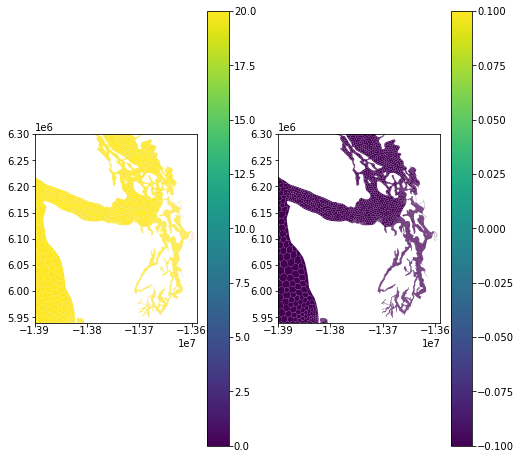

In [31]:
# hard-code date period
dti = pandas.date_range("2014-01-01", periods=367, freq="D")

# Plot threshold for each day
for day in np.arange(170,190):
    model_day = day + ssm['run_information']['spin_up_days'] 
    # date to show in graphic title
    model_date = dti[model_day]
    # define output file name with model day-of-year
    output_file = output_directory/f'{case}_{run_tag}_{model_var}_{stat_type}_conc_{loc}_{model_day+1}.png'

    print(f'Day {model_day} of {ndays}')
    gdf[model_var] = baseline_wc[day,:]-param_wc[day,:]
    gdf["baseline"] = baseline_wc[day,:]

    # Set graphic fontsizes
    mpl.rc('font', size=10)
    # some of the following may be repetetive but can also be set 
    # relative to the font value above (eg "xx-small, x-small,small, 
    # medium, large, x-large, xx-large, larger, or smaller")
    mpl.rc('legend', fontsize=10)
    mpl.rc('axes', titlesize=14)
    mpl.rc('axes', labelsize=10)
    mpl.rc('figure', titlesize=10)
    mpl.rc('font', family='sans-serif', weight='normal', style='normal')

    fig, axs = plt.subplots(1, 2,figsize = (8,8))
    if frame=="Region":
        gdf.loc[(gdf['Regions']==case.capitalize())].plot(
           ax=axs[1,2],
           column=model_var,
           #scheme="User_Defined",
           legend=True,
           #classification_kwds=dict(bins=upper_bounds[model_var]),
           #cmap=mpl.colors.ListedColormap(color_list[model_var])
        )

    else:
        gdf.plot(ax=axs[0],
           column="baseline",
           #scheme="User_Defined", 
           legend=True, 
           vmin=0, vmax=20
           #classification_kwds=dict(bins=upper_bounds[model_var]),
           #cmap=mpl.colors.ListedColormap(color_list[model_var])
        )
        gdf.plot(ax=axs[1],
           column=model_var,
           #scheme="User_Defined", 
           legend=True, 
           #classification_kwds=dict(bins=upper_bounds[model_var]),
           #cmap=mpl.colors.ListedColormap(color_list[model_var])
        )
        for idx in [0,1]:
            # set graphic limits (these capture the range where DO_standard applies)
            axs[idx].set_xlim(-1.39e7,-1.359e7)
            axs[idx].set_ylim(5.94e6,6.3e6)
    # set legend to lower left corner 
    # (instead of default upper-right, which overlaps SOGNB)
    # the legend for salinity and nitrogen doesn't have the 
    # same attributes
    legend = axs[idx].get_legend()
    legend._loc = 3 # lower-left
    if (model_var=='NO3') or (model_var=='DOXG'):
        legend.set_title(f'{model_var} [mg/l]')
    elif model_var=='salinity':
        legend.set_title(f'{model_var} [ppt]')
    # get all the legend labels
    legend_labels = axs[idx].get_legend().get_texts()
    # replace the legend labels
    for bound, legend_label in zip(bounds, legend_labels):
        legend_label.set_text(bound)      
    # remove x-, y-labels
    axs[idx].set_xticklabels('')
    axs[idx].set_yticklabels('')
    # add background landscape
    cx.add_basemap(axs[idx], 
        crs=gdf.crs,
        source=cx.providers.Stamen.TerrainBackground,
        alpha=1
    )
    axs[idx].set_title(
        f"{title_tag[model_var]}\n{model_date.month_name()} {model_date.day:02d}, 2014"
    )
    #plt.savefig(output_file, bbox_inches='tight', format='png')
    plt.clf() #clear figure and memory
